## Homework 3, Problem 4 on real neural data.

ECE C143A/C243A, Spring Quarter 2020, Prof. J.C. Kao, TAs J. Lee, T. Monsoor.


 We will analyze real neural data recorded using a 100-electrode
  array in premotor cortex of a macaque monkey(The neural
    data have been generously provided by the laboratory of
    Prof. Krishna Shenoy at Stanford University.  The data are to be
    used exclusively for educational purposes in this course.).  The
  dataset can be found on CCLE as `ps3_data.mat`.
  
  
  The following describes the data format.  The .mat file has a single
  variable named *trial*, which is a structure of dimensions (182
  trials) $\times$ (8 reaching angles).  The structure contains spike
  trains recorded from a single neuron while the monkey reached 182
  times along each of 8 different reaching angles (where the trials of
  different reaching angles were interleaved).  The spike train for
  the *n*th trial of the *k* th reaching angle is contained in
  *trial(n,k).spikes*, where *n* $\;=1,\dots,182$ and * k*$\;=1,\ldots,8$.  The indices *k *$\;=1,\ldots,8$ correspond
  to reaching angles $\frac{30}{180}\pi$, $\frac{70}{180}\pi$,
  $\frac{110}{180}\pi$, $\frac{150}{180}\pi$, $\frac{190}{180}\pi$,
  $\frac{230}{180}\pi$, $\frac{310}{180}\pi$, $\frac{350}{180}\pi$,
  respectively.  The reaching angles are not evenly spaced around the
  circle due to experimental constraints that are beyond the scope of
  this homework.

  A spike train is represented as a sequence of zeros and ones, where
  time is discretized in 1 ms steps.  A zero indicates that the neuron
  did not spike in the 1 ms bin, whereas a one indicates that the
  neuron spiked once in the 1 ms bin.  Due to the refractory period,
  it is not possible for a neuron to spike more than once within a
  1 ms bin.  Each spike train is 500 ms long and is, thus, represented
  by a 1 $\times$ 500 vector.
  
  We load this data for you using the `sio` library.  Be sure that `ps3_data.mat` is in the same directory as this notebook / on the system path.  If you prefer to have it on a different path, specify it in the `sio.loadmat` command.

In [1]:
"""
ECE C143/C243 Homework-3 Problem-4

"""

# Importing the necessary packages

import numpy as np
import matplotlib.pyplot as plt
import nsp as nsp
import scipy.special
import scipy.io as sio

# Importing the Matlab data
data = sio.loadmat('ps3_data.mat') # load the .mat file.
num_trials = data['trial'].shape[0]
num_cons = data['trial'].shape[1]

# Load matplotlib images inline
%matplotlib inline

# Reloading any code written in external .py files.
%load_ext autoreload
%autoreload 2

### (a) (6 points) Spike trains
Generate the `spike_times` matrix for the real data.  This should have the same `spike_times` format described in problem 2.  The following code, when complete, will plot 5 spike trains for each reaching angle in the same format as shown in Figure 1.6(A) in *TN*.  To simplify the plotting

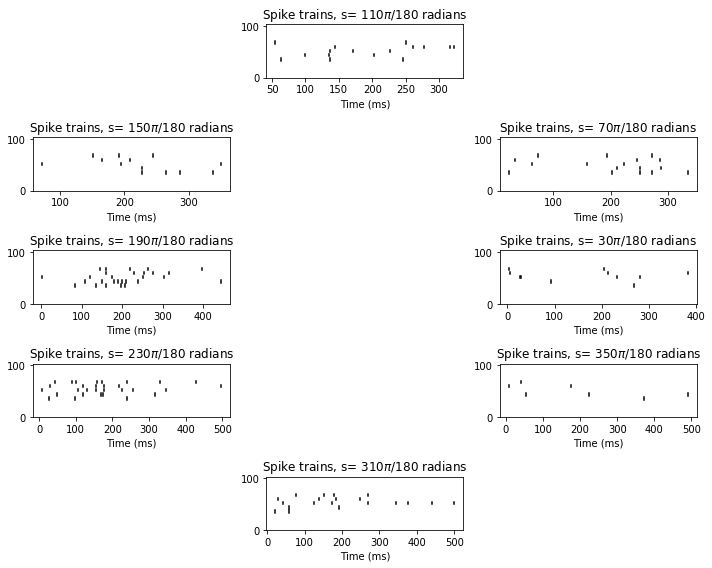

In [2]:
## 4a

T = 500; #trial length (ms)

num_rasters_to_plot = 5; # per reaching angle

s = np.pi*np.array([30.0/180,70.0/180,110.0/180 ,150.0/180 ,190.0/180 ,230.0/180 ,310.0/180 ,350.0/180]) # radians
s_labels = ['30$\pi$/180', '70$\pi$/180', '110$\pi$/180', '150$\pi$/180', '190$\pi$/180',
            '230$\pi$/180', '310$\pi$/180', '350$\pi$/180']

# These variables help to arrange plots around a circle
num_plot_rows = 5
num_plot_cols = 3
subplot_indx = [9, 6, 2, 4, 7, 10, 14, 12]

# Initialize the spike_times array
spike_times = np.empty((num_cons, num_trials), dtype=list)

plt.figure(figsize=(10,8))
for con in range(num_cons):
    for rep in range(num_trials):
        #====================================================#
        # YOUR CODE HERE:
        #   Calculate the spike trains for each reaching angle.
        #   You should calculate the spike_times array that you 
        #   computed in problem 2.  This way, the following code
        #   will plot the histograms for you.
        #====================================================#  
        trial = data["trial"][rep, con] # Extract specific spike train sequence
        times = np.empty(0) # Stores spike times for each spike train
        count = 0 # Counts time of spike (ms)
        
        # Iterate through entire spike train
        for spike in trial[1][0]:
            count += 1 # Increment the time through each bin
            
            if spike == 1: # i.e. we come across a spike
                times = np.append(times, count)
        
        spike_times[con, rep] = times
        #====================================================#
        # END YOUR CODE
        #====================================================# 

    plt.subplot(num_plot_rows, num_plot_cols, subplot_indx[con])
    nsp.PlotSpikeRaster(spike_times[con, 0:num_rasters_to_plot])
    plt.title('Spike trains, s= '+s_labels[con]+' radians')
    plt.tight_layout()

### (b) (5 points) Spike histogram
For each reaching angle, find the spike histogram by taking spike counts in non-overlapping 20~ms bins, then averaging across the 182 trials.  The spike histograms should have firing rate (in spikes / second) as the vertical axis and time (in msec, not time bin index) as the horizontal axis.  Plot the histogram for 500ms worth of data.  Plot the 8 resulting spike histograms around a circle, as in part (a).

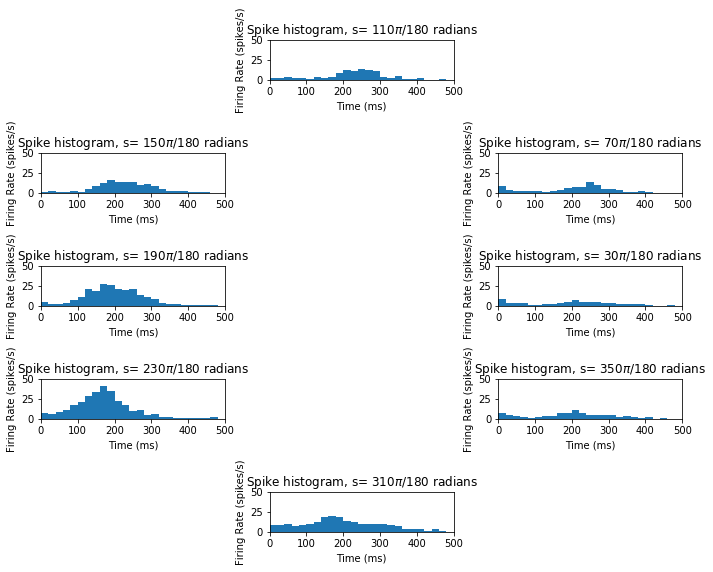

In [3]:
## 4b
bin_width = 20 # (ms)
bin_centers = np.arange(bin_width/2,T,bin_width) # (ms)
plt.figure(figsize=(10,8))
max_t = 500 # (ms)
max_rate = 50 # (in spikes/s)

b = [i * 20 for i in range(25)] # Creates bin list

for con in range(num_cons):
    plt.subplot(num_plot_rows,num_plot_cols,subplot_indx[con])
    #====================================================#
    # YOUR CODE HERE:
    #   Plot the spike histogram
    #====================================================#  
    hist_values = np.zeros(24) # Creates empty numpy array
    
    for trial in range(num_trials):
        hist, bin_edges = np.histogram(spike_times[con, trial], b)
        hist_values = np.add(hist_values, hist)
    
    # Divide by 102 (trials), divide by 0.02 (20 milliseconds)
    hist_values = np.divide(hist_values, 3.64) 
    plt.bar(bin_edges[:-1], hist_values, width = bin_width, align = "edge")
    plt.xlabel("Time (ms)")
    plt.ylabel("Firing Rate (spikes/s)")
    #====================================================#
    # END YOUR CODE
    #====================================================# 
    plt.axis([0, max_t, 0, max_rate])
    plt.title('Spike histogram, s= '+s_labels[con]+' radians')
    plt.tight_layout()

### (c) (4 points) Tuning curve
For each trial, count the number of spikes across the entire trial.  Plots these points on the axes shown in Figure 1.6(B) in *TN*.  There should be $182\cdot 8$ points in the plot (but some points may be on top of each other due to the discrete nature of spike counts). For each reaching angle, find the mean firing rate across the 182 trials, and plot the mean firing rate using a red point on the same plot. 
Then, fit the cosine tuning curve \eqn{tuning} to the 8 red points by minimizing the sum of squared errors
    \begin{align}
      \sum_{i=1}^8\big(\lambda(s_i) - r_0 - (r_\text{max} -
      r_0)\cos(s_i-s_\text{max})\big)^2 \nonumber
    \end{align}
with respect to the parameters $r_0$, $r_\text{max}$, and $s_\text{max}$.  (Hint: this can be done using linear regression; refer to Homework \# 2.) Plot the resulting tuning curve of this neuron in green on the same plot.

Text(0.5, 1.0, 'Firing rates, mean firing rate and tuning curve')

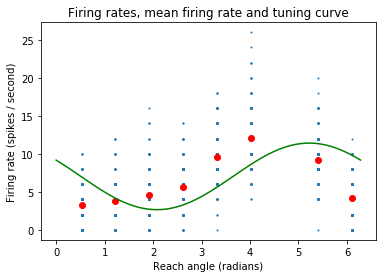

In [4]:
#====================================================#
# YOUR CODE HERE:
# Tuning curve. Please use the following colors for plot:
# Firing rates(blue);Mean firing rate(red); Cosine tuning curve(green)
#====================================================#  
spike_counts = np.zeros((num_cons, num_trials))
x = [] # List to hold x-coordinates of all points
y = [] # List to hold firing rates for all points
avg_x = [] # List to hold eight reach directions
avg_y = [] # List to hold mean firing rates for each reach angle

A = np.empty((num_cons, 3)) # Coefficient matrix for linear regression

for con in range(num_cons):
    s_0 = [s[con] for i in range(num_trials)]
    x.append(s_0) # Populate x with 182 copies of each reach angle
    avg_x.append(s[con])
    
    counter = [] # Keeps track of spike count per reach angle
    mean_spikes = 0.0 # Stores mean firing rate
    
    for trial in range(num_trials):
        num_spikes = len(spike_times[con, trial])
        y.append(num_spikes * 2) # Fires twice as many spikes in 1 second
        counter.append(num_spikes)
        mean_spikes += num_spikes * 2 # Used to calculate firing rate
        
    spike_counts[con, :] = counter # Update spike_counts list accordingly
    mean_spikes = np.divide(mean_spikes, 182.0) # Calculate mean firing rate
    avg_y.append(mean_spikes) # Append mean firing rate
    
    # Set parameters for linear regression
    k0_coeff = 1.0
    k1_coeff = 1.0 * np.cos(s[con])
    k2_coeff = 1.0 * np.sin(s[con])
    
    A[con, :] = [k0_coeff, k1_coeff, k2_coeff] # Update coefficient matrix
    
Y = np.empty((num_cons, 1)) # Initialize Y matrix for linear regression
for i in range(num_cons): Y[i, :] = avg_y[i]

# Perform linear regression method
W_1 = np.linalg.inv(A.T.dot(A)) # Calculates (A^T)A
W_2 = A.T.dot(Y) # Calculates (A^T)Y
W = W_1.dot(W_2) # Calculates coefficient matrix

# Set our k0, k1, k2 parameters accordingly, simplifying equation as in HW2
k_0 = W[0][0]
k_1 = W[1][0]
k_2 = W[2][0]

# Set tuning curve parameters accordingly
r_0 = k_0
c = np.sqrt(k_1 ** 2 + k_2 ** 2) # c = r_max - r_0
r_max = c + r_0
s_max = np.arcsin(k_2 / c) # Keep in radians

# Tuning curve essentials
tuning_x = np.linspace(0, 6.28, 6280)
tuning_y = r_0 + (r_max - r_0) * np.cos(tuning_x - s_max)

plt.scatter(x, y, s = 1) # Scatters all 1456 points
plt.scatter(avg_x, avg_y, c = "red")
plt.plot(tuning_x, tuning_y, c = "green")
#====================================================#
# END YOUR CODE
#====================================================# 
plt.xlabel('Reach angle (radians)')
plt.ylabel('Firing rate (spikes / second)')
plt.title('Firing rates, mean firing rate and tuning curve')

### (d) (6 points) Count distribution
For each reaching angle, plot the normalized distribution of spike counts (using the same counts from part (c)).  Plot the 8 distributions around a circle, as in part (a).  Fit a Poisson distribution to each empirical distribution and plot it on top of the corresponding empirical distribution.

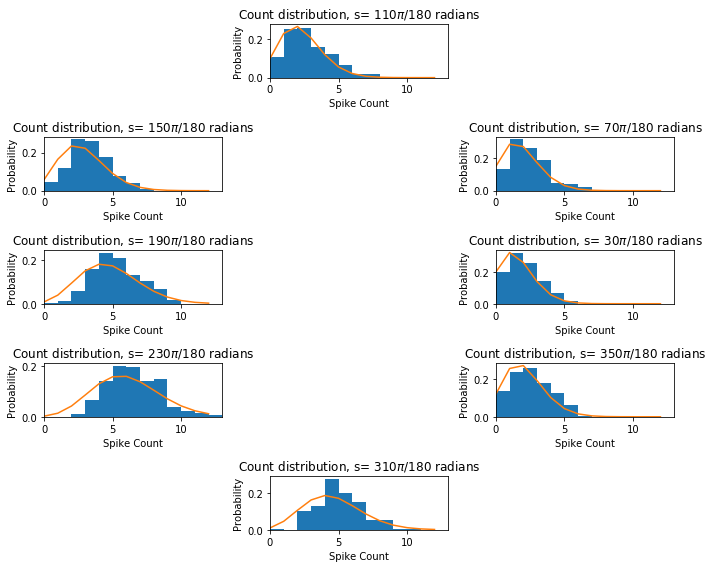

In [5]:
plt.figure(figsize=(10,8))
max_count = 13
spike_count_bin_centers =  np.arange(0,max_count,1)

for con in range(num_cons):
    plt.subplot(num_plot_rows,num_plot_cols,subplot_indx[con])
    #====================================================#
    # YOUR CODE HERE:
    #   Find the empirical mean of the poission distribution
    #   and calculate the Poisson distribution.
    #====================================================#  
    # Plots normalized histogram
    b = [i for i in range(15)] # Create bin list
    plt.hist(spike_counts[con], bins = b, density = True)
    
    trial = spike_counts[con, :] # Obtains data from each trial
    mean = sum(trial) / 182.0 # Equivalent to lambda in a Poisson distribution
    k = [i for i in range(max_count)]
    
    # List that holds Poisson distribution values
    poison = [((mean ** k) * np.exp(-mean)) / np.math.factorial(k) for k in k]
    #====================================================#
    # END YOUR CODE
    #====================================================# 
    
    #====================================================#
    # YOUR CODE HERE:
    #   Plot the empirical distribution of spike counts and the 
    #   Poission distribution you just calculated
    #====================================================#  
    plt.plot(k, poison) # Plots the Poisson distribution
    plt.xlabel("Spike Count")
    plt.ylabel("Probability")
    #====================================================#
    # END YOUR CODE
    #====================================================# 
    plt.xlim([0, max_count])
    plt.title('Count distribution, s= '+ s_labels[con]+' radians')
    plt.tight_layout()  

#### Question:
Why might the empirical distributions differ from the idealized Poisson distributions?

#### Your answer: Since the data is generated from a real test subject, and not by a computer, there may be some slight error, such that the empirical distributions differ slightly from idealized Poisson distributions. However, from the graphs, the Poisson distribution still seems like a reasonable approximate for the empirical data.

### (e) (4 points) Fano factor
For each reaching angle, find the mean and variance of the spike counts across the 182 trials (using the same spike counts from part (c)).  Plot the obtained mean and variance on the axes shown in Figure 1.14(A) in *TN*.  There should be 8 points in this plot -- one per reaching angle.

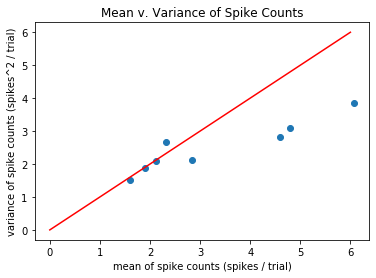

In [6]:
## 4e

#====================================================#
# YOUR CODE HERE:
# Plot the mean and variance of spike counts on the axes
#====================================================#
mean = [] # List to store mean spike counts
variance = [] # List to store variance of spike counts

for con in range(num_cons):
    # Append the average spike count
    mean.append(sum(spike_counts[con, :]) / float(num_trials))
    
    total = 0.0 # Tracks variance of spike counts
    for trial in range(num_trials):
        total += (spike_counts[con, trial] - mean[con]) ** 2.0
    
    total /= float(num_trials)
    variance.append(total)
    
# 45 Degree Diagonal
x = np.linspace(0, 6, 600)
y = x

# Plot Appropriately
plt.scatter(mean, variance)
plt.plot(x, y,  c = "red")
plt.title("Mean v. Variance of Spike Counts")
#====================================================#
# END YOUR CODE
#====================================================#
plt.xlabel('mean of spike counts (spikes / trial)')
plt.ylabel('variance of spike counts (spikes^2 / trial)')
plt.show()

#### Question: 
  Do these points lie near the 45 deg diagonal, as would be expected of a Poisson distribution?

#### Your answer: Despite the data not being ideal (as it is generated from real life experiments), the points do lie near, or reasonably near, the 45 degree diagonal, as would be expected of a Poisson distribution (for small averages, empirical data will fit the curve fairly well).

### (f) (5 points) Interspike interval (ISI) distribution
For each reaching angle, plot the normalized distribution of ISIs. Plot the 8 distributions around a circle, as in part (a). Fit an exponential distribution to each empirical distribution and plot it on top of the corresponding empirical distribution.

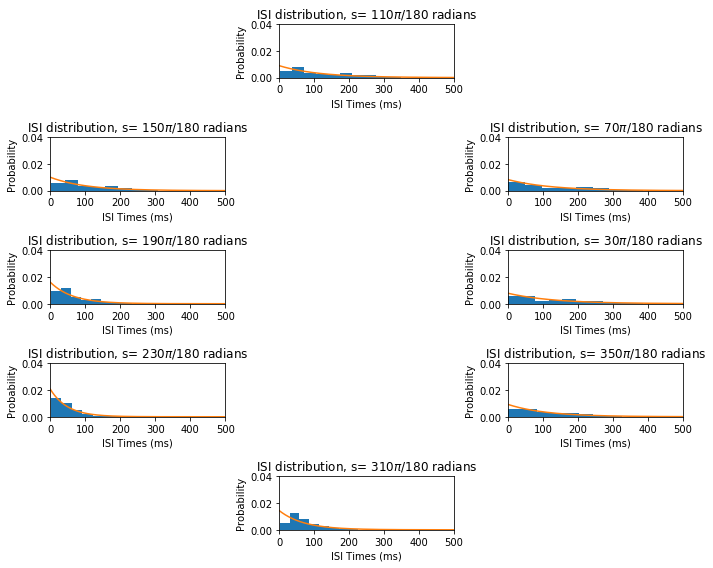

In [7]:
## 4f
plt.figure(figsize=(10,8))
num_ISI_bins = 200
for con in range(num_cons) :
    plt.subplot(num_plot_rows,num_plot_cols,subplot_indx[con])
    #====================================================#
    # YOUR CODE HERE:
    #   Plot the interspike interval (ISI) distribution and
    #   an exponential distribution with rate given by the inverse
    #   of the mean ISI.
    #====================================================#
    isi_dist_row = [] # List to keep track of all ISI times
    
    for trial in range(num_trials):
        counter = spike_times[con, trial] # Obtains spike train for one trial
        
        for i in range(len(counter)):
            if (i == 0):
                t_isi = counter[i]
            else: # Calculate the interspike interval
                t_isi = counter[i] - counter[i - 1] 
            isi_dist_row.append(t_isi)
            
    # Calculates average of each reach angle
    mean_isi = sum(isi_dist_row) / len(isi_dist_row) 
    
    # Plots the normalized distribution
    plt.hist(isi_dist_row, density = "True") 
    
    l = 1.0 / mean_isi # Calculates lambda for an exponential distribution
    x = np.linspace(0, 500, 1000)
    exponential = l * np.exp(-l * x) # Exponential distribution equation
    
    plt.plot(x, exponential) # Plot the exponential distribution
    plt.xlabel("ISI Times (ms)")
    plt.ylabel("Probability")
    plt.ylim(0.0, 0.02)
    #====================================================#
    # END YOUR CODE
    #====================================================#
    plt.title('ISI distribution, s= '+ s_labels[con]+' radians')    
    plt.axis([0, max_t, 0, 0.04])
    plt.tight_layout() 

### Question: 
 Why might the empirical distributions differ from the idealized exponential distributions?

#### Your answer: As the data is not ideal, it is very likely that therefore, we cannot expect the ISI times to be exponentially distributed (true for an ideal homogeneous Poisson Process). Since real-life experiments can never completely mimic ideal behavior, we should assume that there may be slight differences between the empirical distributions and exponential distributions. 